In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from joblib import dump, load

In [2]:
X = pd.read_csv("X.csv", index_col=0)
y = pd.read_csv("y.csv", index_col=0)
X

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,174.0,650.0,2.588828e+09,4.300822,324.0,2.196185,1085.0,357.892864,169.490477,256.0,...,39.698866,39.115214,35.693137,39.874804,15651.083333,29.130457,0.795019,3806.004555,0.243178,15709.0
1,427.0,826.0,1.555094e+09,4.670797,229.5,2.685919,1077.0,626.103994,128.342289,632.0,...,22.671568,23.769729,24.413111,27.000000,3703.416667,18.059959,0.727742,1590.651380,0.429509,3731.0
2,212.0,697.0,6.472778e+09,4.796344,283.0,2.510939,1170.0,459.821288,154.048324,457.0,...,42.720019,46.238512,44.944410,46.914816,26368.250000,37.044511,0.752399,5694.078769,0.215945,26400.0
3,429.9,856.0,6.238777e+09,4.777974,210.0,4.546907,1463.0,633.593407,134.813886,612.0,...,63.820060,36.055513,54.626001,64.327288,14306.666667,26.111726,0.597259,4771.779131,0.333535,14410.0
4,358.0,649.0,1.212578e+10,4.199889,143.0,3.011379,1056.0,508.111091,88.454307,511.0,...,53.665631,57.706152,59.774577,60.646517,44537.541667,43.406304,0.634706,9573.316675,0.214949,44774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,3754.0,7206.9,1.021032e+12,7.652972,1937.0,2.885087,11777.0,5592.867096,1065.960253,5670.0,...,53.000000,49.040799,41.146081,53.972215,30850.416667,32.945548,0.717464,6630.174444,0.214914,30932.0
355,648.0,1422.0,2.668548e+10,5.384028,463.0,3.096456,2749.0,993.503008,246.611399,972.0,...,35.227830,66.910388,67.268120,69.778220,24684.666667,31.414140,0.597705,6859.333413,0.277878,24765.0
356,2250.2,5166.0,2.305284e+11,7.453490,1575.5,2.531188,7216.0,3680.912932,891.534753,3644.0,...,36.055513,46.957428,41.303753,47.686476,15592.375000,26.732679,0.693717,4350.875982,0.279039,15643.0
357,1652.0,5113.0,6.660589e+11,7.591514,2107.0,2.602830,8575.0,3346.971976,1086.213192,3359.0,...,52.354560,54.083269,51.039201,56.142675,51393.333333,41.408206,0.820776,8144.490174,0.158474,51455.0


# 1. Data preparation and visualisation
We observe a clear imbalance in the data

In [3]:
y['diagnostic'].value_counts()

HGG    283
LGG     76
Name: diagnostic, dtype: int64

## 1.1 Oversampling in the train dataset

There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

- Random Oversampling: Randomly duplicate examples in the minority class.
- Random Undersampling: Randomly delete examples in the majority class.
Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [4]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [5]:
X_over, y_over = oversample.fit_resample(X, y)

In [6]:
X_over.columns

Index(['original_firstorder_10Percentile', 'original_firstorder_90Percentile',
       'original_firstorder_Energy', 'original_firstorder_Entropy',
       'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis', 'original_firstorder_Maximum',
       'original_firstorder_Mean', 'original_firstorder_MeanAbsoluteDeviation',
       'original_firstorder_Median', 'original_firstorder_Minimum',
       'original_firstorder_Range',
       'original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness',
       'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity',
       'original_firstorder_Variance', 'original_glcm_Autocorrelation',
       'original_glcm_ClusterProminence', 'original_glcm_ClusterShade',
       'original_glcm_ClusterTendency', 'original_glcm_Contrast',
       'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
       'original_glcm_DifferenceEntropy', 'original_glcm_

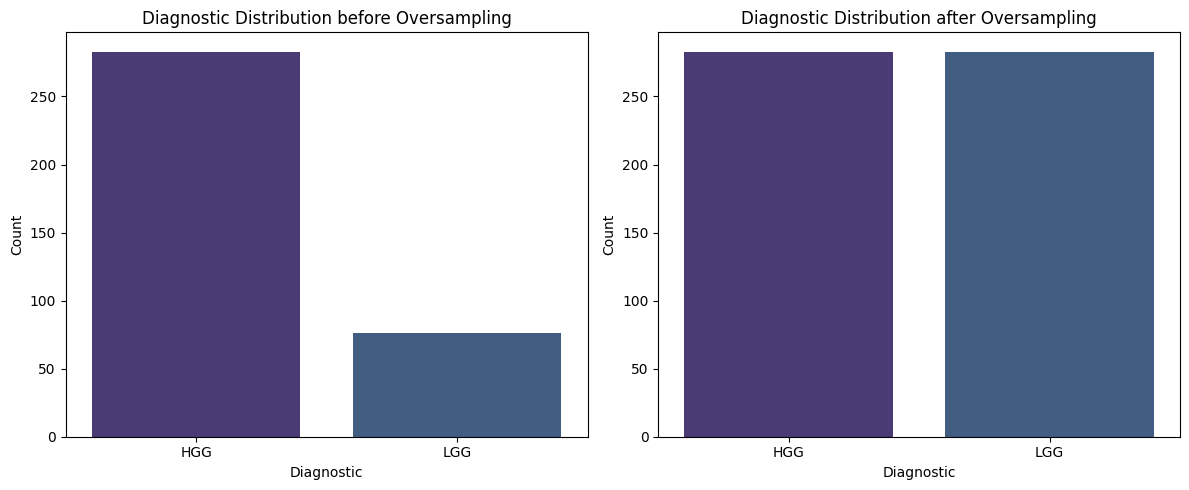

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to use Viridis color palette
sns.set_palette("viridis")

# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First count plot - before oversampling
sns.countplot(x="diagnostic", data=y, ax=axes[0])
axes[0].set_title("Diagnostic Distribution before Oversampling")
axes[0].set_xlabel("Diagnostic")
axes[0].set_ylabel("Count")

# Second count plot - after oversampling
sns.countplot(x="diagnostic", data=y_over, ax=axes[1])
axes[1].set_title("Diagnostic Distribution after Oversampling")
axes[1].set_xlabel("Diagnostic")
axes[1].set_ylabel("Count")

# Adjust layout and display plots
plt.tight_layout()
plt.show()


## 1.2 Scale the data
As we can observe in the df, the data is in different units and magnitudes. It's essential to have it standarised.

In [8]:
X_cols = X_over.columns

In [9]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X_over)

In [10]:
X = pd.DataFrame(X, columns=X_cols)
X.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,-0.449473,-0.335193,-0.251662,-0.084911,-0.096373,-0.576915,-0.375441,-0.412967,-0.135235,-0.481648,...,-0.666575,-0.923728,-1.028111,-1.103342,-0.761069,-0.686620,1.387345,-0.859971,-0.256855,-0.761450
1,-0.208912,-0.245551,-0.254433,0.159012,-0.241679,-0.433211,-0.378154,-0.228837,-0.261501,-0.213885,...,-1.684563,-1.653578,-1.576567,-1.703313,-1.043155,-1.528187,0.811550,-1.177610,1.228378,-1.043921
2,-0.413342,-0.311254,-0.241251,0.241785,-0.159416,-0.484556,-0.346615,-0.342992,-0.182620,-0.338509,...,-0.485954,-0.584936,-0.578298,-0.775274,-0.508036,-0.085002,1.022577,-0.589257,-0.473935,-0.509330
3,-0.206155,-0.230271,-0.241878,0.229674,-0.271663,0.112859,-0.247253,-0.223696,-0.241643,-0.228128,...,0.775526,-1.069251,-0.107561,0.036154,-0.792811,-0.916101,-0.305193,-0.721497,0.463376,-0.792084
4,-0.274520,-0.335702,-0.226099,-0.151456,-0.374684,-0.337712,-0.385275,-0.309841,-0.383901,-0.300054,...,0.168437,-0.039522,0.142772,-0.135371,-0.079057,0.398615,0.015297,-0.033048,-0.481867,-0.076026


In [14]:
X.to_csv("X_scaled.csv", index=False)
y_over.to_csv("y_over.csv", index=False)

# 2. Correlation of variables

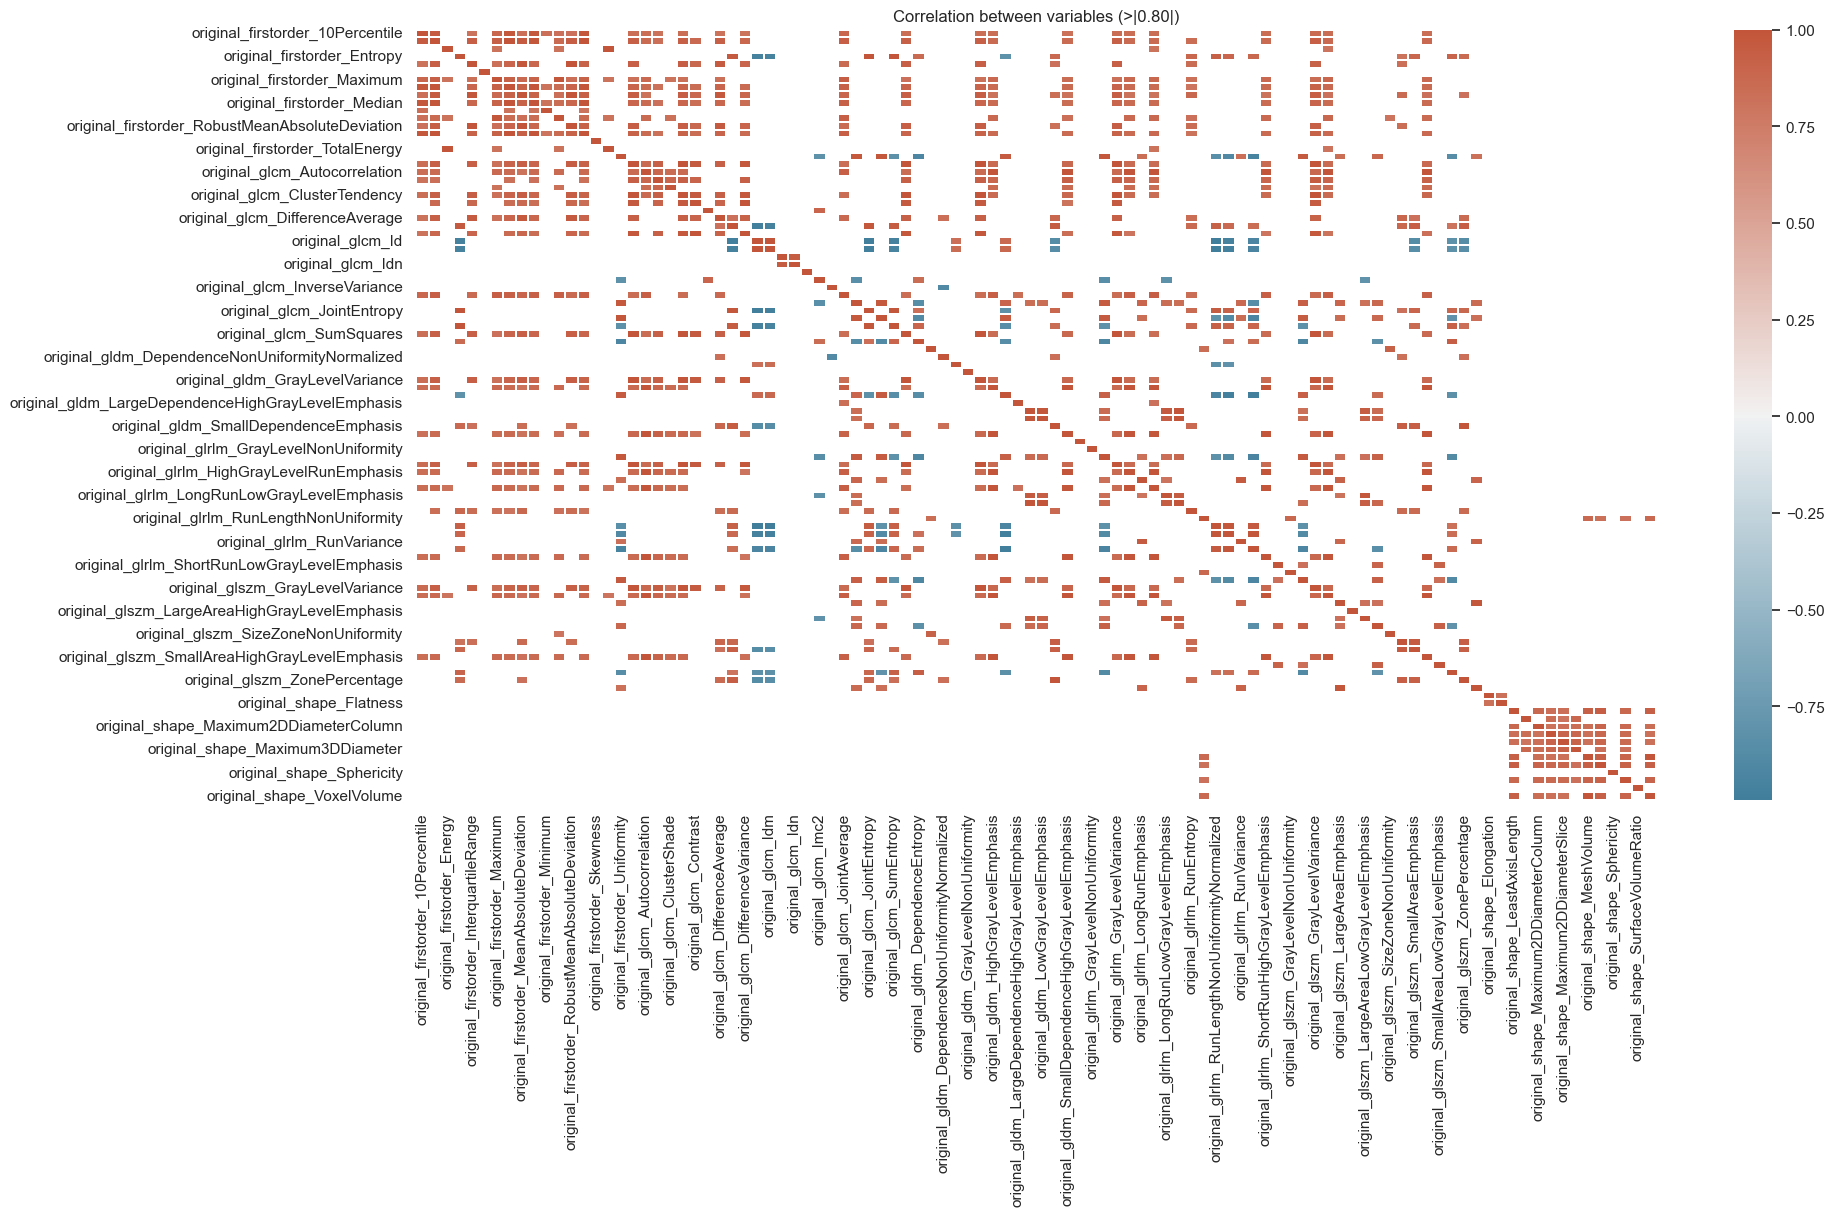

In [64]:
correlation = X.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
masked_corr_matrix = correlation[(correlation > 0.80) | (correlation < -0.80)]
plt.figure(figsize=(20, 10))
sns.heatmap(masked_corr_matrix, 
            cmap=cmap, 
            annot=False, 
            fmt='.2f', 
            linewidths=.05).set_title("Correlation between variables (>|0.80|)")
plt.show()

## 2.1 Clustering + PCA
https://realpython.com/k-means-clustering-python/

In [13]:
import urllib
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(y.diagnostic)
true_labels[:5]

array([0, 0, 0, 0, 0])

In [15]:
n_clusters = len(label_encoder.classes_)
n_clusters

2

In [16]:
preprocessor = Pipeline(
[("pca", PCA(n_components=2, random_state=42)),])

In [17]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [ ]:
# pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
pipe.fit(X)

In [19]:
preprocessed_data = pipe["preprocessor"].transform(X)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels)

0.7356690384348621

In [20]:
adjusted_rand_score(true_labels, predicted_labels)

-0.010888479419068724

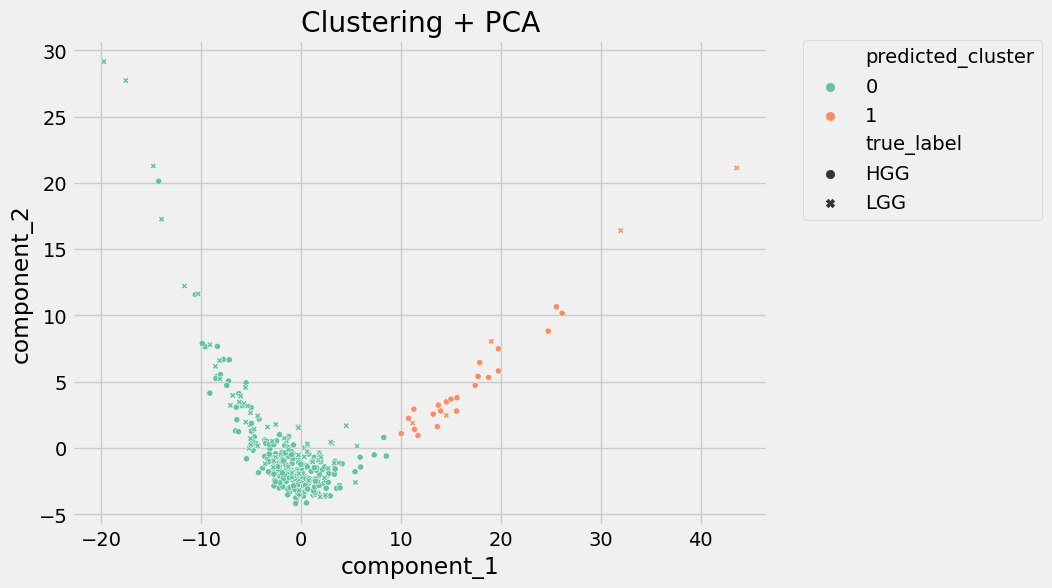

In [21]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(X),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 6))

scat = sns.scatterplot(
    x="component_1",  # Specify the x-axis data
    y="component_2",  # Specify the y-axis data
    s=20,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering + PCA"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()


# 3. Features selection and reduction

In [16]:
from sklearn.decomposition import PCA
#we want to preserve the 95% of variability of data
pca = PCA(.95)
components = pca.fit_transform(X)
pca2 = pca.fit_transform(X)

In [18]:
import numpy as np
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)

,VarPerc,cumVarPerc
0,41.233948,41.233948
1,19.191220,60.425168
2,13.928586,74.353754
3,6.348081,80.701835
4,3.023877,83.725712
5,2.451273,86.176985
6,2.281998,88.458983
7,1.890584,90.349567
8,1.554178,91.903746
9,1.342679,93.246425


The new X dataset will be:

In [19]:
principal_df = pd.DataFrame(data = pca2
             , columns = ["PCA"+str(i+1) for i in range(len(expVar))])
principal_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13
0,-0.931989,-1.019388,-3.443810,-0.083553,-1.340273,1.150648,0.090682,-0.168803,0.744516,-0.591717,0.712446,-0.452955,-0.045498
1,0.377268,-1.310521,-6.368761,1.485985,-2.051048,1.459328,-0.609855,-1.787641,1.351890,0.595869,-0.425879,0.908507,-0.628592
2,-0.114999,-1.872721,-2.456149,0.788203,-1.831955,1.086849,0.252828,-0.521831,0.604551,0.052077,0.146240,-0.365753,-0.099160
3,0.266293,-2.031055,-2.870708,2.102237,2.276372,-2.115128,-0.108769,-0.079337,0.549509,-0.366945,1.410243,-0.705089,0.102983
4,-1.155342,-1.891173,-0.524663,0.371588,-0.474995,-0.097577,0.104483,-0.998674,0.117177,1.330406,0.275266,-0.179376,0.449953
...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2.932791,-2.395587,1.615472,2.834625,1.176405,-0.213996,-1.138929,2.836125,1.434288,-0.809027,-0.147793,0.314571,0.627481
562,-2.232145,-0.535564,-4.788690,-1.535369,-0.414287,1.569685,-0.861551,-0.707865,-0.494595,1.401680,-0.313257,-0.243952,0.339567
563,-7.063804,5.212944,-1.331179,-1.500785,1.563094,2.263118,6.694829,1.545323,2.425523,-2.503361,-1.868814,-1.310885,-0.401879
564,12.352823,2.191292,-2.811669,0.782104,-1.654637,-1.299027,0.214360,1.220443,-1.913281,-1.831505,-0.267492,0.951748,-0.663012


<Figure size 640x480 with 0 Axes>

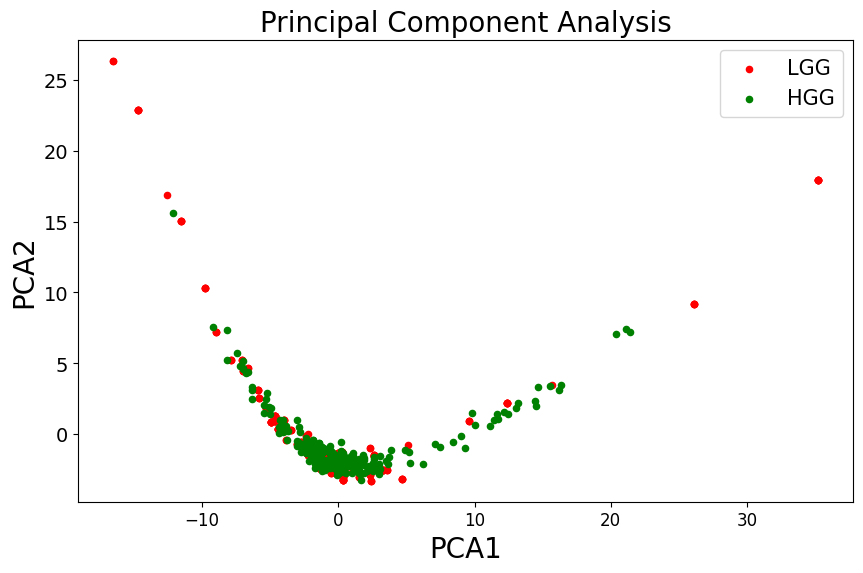

In [22]:
plt.figure()
plt.figure(figsize=(10,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PCA1',fontsize=20)
plt.ylabel('PCA2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = ['LGG', 'HGG']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y_over['diagnostic'] == target
    plt.scatter(principal_df.loc[indicesToKeep, 'PCA1']
               , principal_df.loc[indicesToKeep, 'PCA2'], c = color, s = 20)

plt.legend(targets,prop={'size': 15})

Looking at this plot, the principal components are not able to separate both populations: LGG and HGG. However, we will make some experiments using PCA as a feature reduction method.

# 3. Explainable models (JUST PROVES)
https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models

## 3.0 Train and test split

In [23]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_over, test_size=0.20, random_state=11)
X_train2, X_test2, y_train2, y_test2 = train_test_split(principal_df, y_over, test_size=0.20, random_state=11)
X_train1.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
74,-0.268815,-0.332137,-0.244757,-0.098017,-0.386985,0.290015,-0.239114,-0.311674,-0.369958,-0.310024,...,-0.352967,0.827112,-1.050735,0.724625,-0.682853,-0.890259,-0.544341,-0.539568,0.343793,-0.683203
243,0.085847,-0.095809,-0.072962,0.003217,-0.219383,-0.587383,-0.205880,-0.016175,-0.278904,0.002603,...,0.601041,0.962386,0.894710,0.789737,0.689333,0.751620,-0.708615,0.877221,-0.548763,0.689839
214,-0.573082,-0.595968,-0.257672,-1.222141,-0.508457,0.221999,-0.632834,-0.600239,-0.557092,-0.610544,...,-0.258840,0.228823,0.259199,-0.000289,-0.209800,-0.033262,-0.456954,-0.029702,-0.233819,-0.209998
486,1.031929,1.337640,0.219934,1.668838,1.213687,2.997979,4.138263,1.158493,1.574187,1.037335,...,-0.657556,-0.858013,-0.806586,-0.999320,-0.599268,-0.563011,1.737986,-0.744555,-0.562017,-0.600193
442,0.206603,0.013187,-0.210349,0.338875,-0.199394,-0.285858,-0.027163,0.095232,-0.197094,0.117969,...,-0.899371,-0.633298,-0.675667,-0.821454,-0.789480,-0.675982,-1.269726,-0.556836,1.071007,-0.789796


In [24]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# helper function for evaluating a given classifier
def evaluate_classifier(y_test,pred):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.grid(False)
    plt.show()

## 3.1 Random Forest Classifier

### A. With no preprocessing

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [133]:
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : list(i for i in range(2,11)),
    'criterion' :['gini', 'entropy']
}

CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5)
CV_rfc1.fit(X_train1, y_train1.diagnostic)
print("Best Parameters:", CV_rfc1.best_params_)
print("Best Score:", CV_rfc1.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}
Best Score: 0.9424175824175822


The optimal configuration is `n_estimators=100`, `max_features=log2`, `max_depth=7` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [135]:
rf1 = RandomForestClassifier(max_depth=7, random_state=42, criterion="entropy", max_features="log2", n_estimators=100)
rf1.fit(X_train1, y_train1.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       random_state=42)

In [136]:
#save the model to not run everything from scratch
dump(rf1, 'RF1.joblib')

['RF1.joblib']

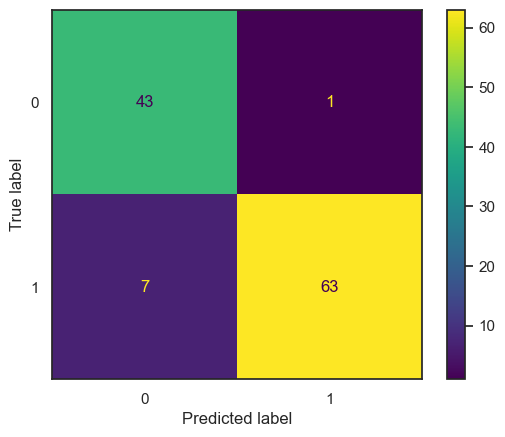

None
              precision    recall  f1-score   support

         HGG       0.86      0.98      0.91        44
         LGG       0.98      0.90      0.94        70

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



In [137]:
rf1 = load('RF1.joblib')
y_pred = rf1.predict(X_test1)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

Variable Importance Plot - Global Interpretation


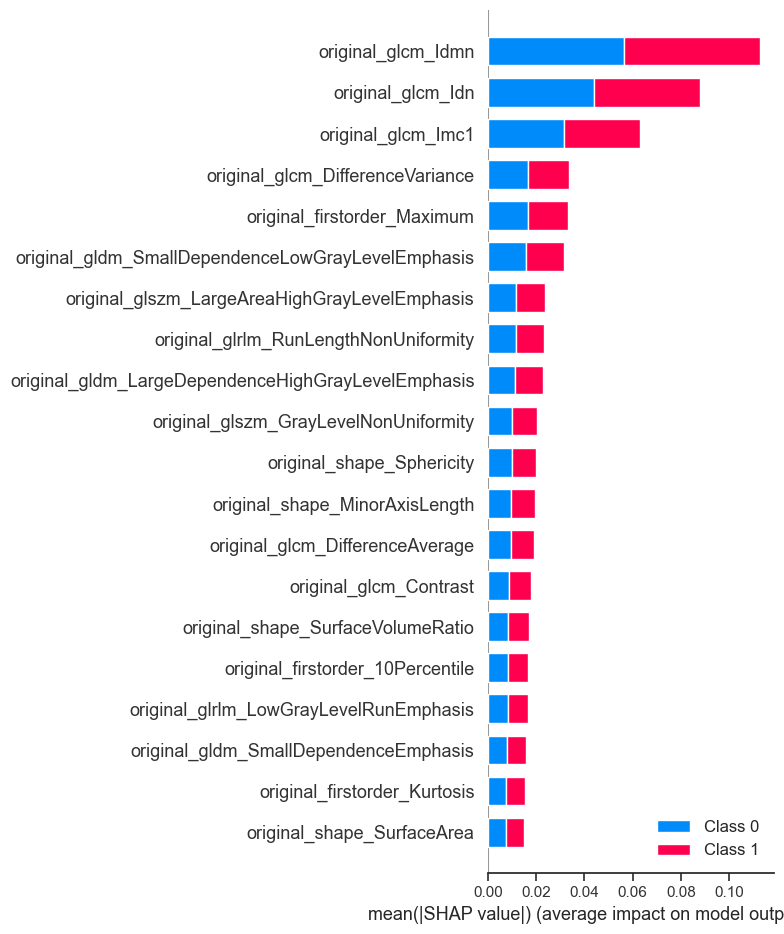

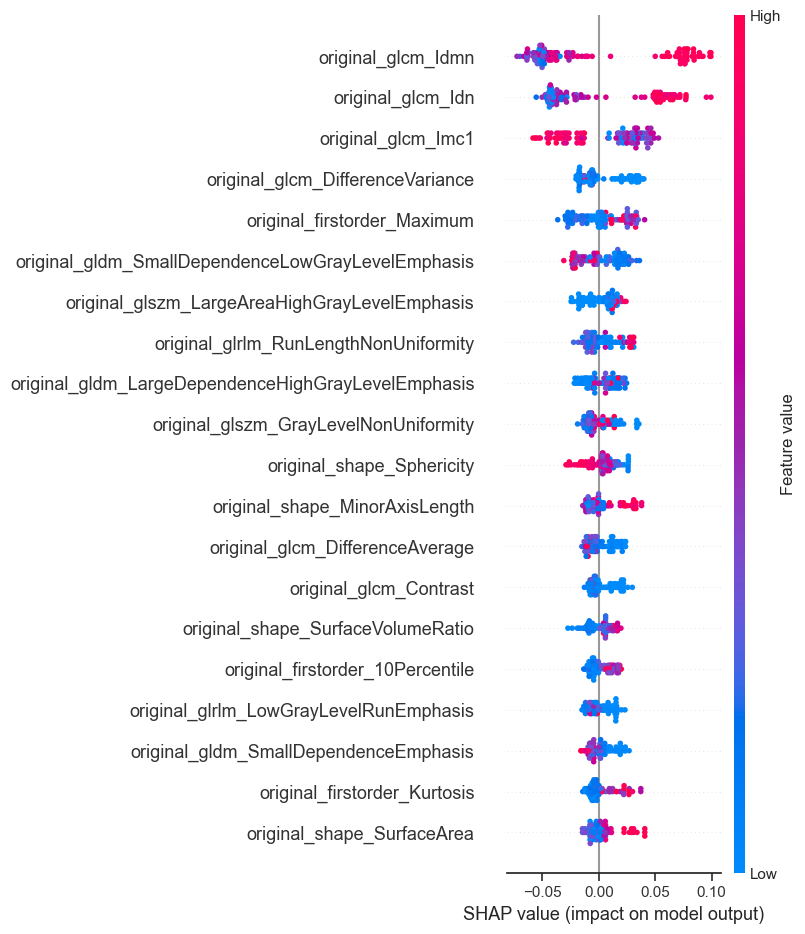

In [140]:
import shap

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf1)
shap_values = explainer.shap_values(X_test1)
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test1)
shap.summary_plot(shap_values[1], X_test1)

### B. Features selection with PCA

In [26]:
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : list(i for i in range(2,11)),
    'criterion' :['gini', 'entropy']
}

CV_rfc1 = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5)
CV_rfc1.fit(X_train1, y_train1.diagnostic)
print("Best Parameters:", CV_rfc1.best_params_)
print("Best Score:", CV_rfc1.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 500}
Best Score: 0.949084249084249


The optimal configuration is `n_estimators=100`, `max_features=sqrt`, `max_depth=9` and `criterion=entropy`. We train the model again and we save it to not build it from scratch.

In [27]:
rf2 = RandomForestClassifier(max_depth=7, random_state=42, criterion="entropy", max_features="log2", n_estimators=500)
rf2.fit(X_train2, y_train2.diagnostic)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       n_estimators=500, random_state=42)

In [28]:
#save the model to not run everything from scratch 
dump(rf2, 'RF2.joblib')

['RF2.joblib']

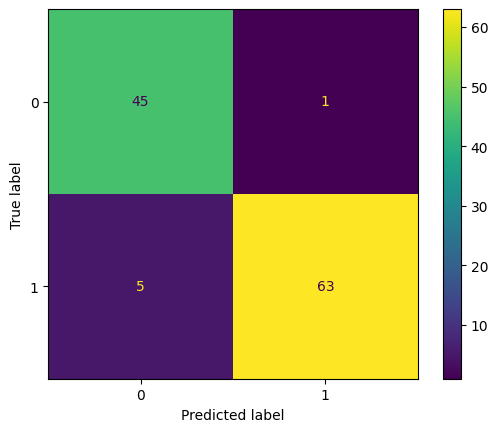

None
              precision    recall  f1-score   support

         HGG       0.90      0.98      0.94        46
         LGG       0.98      0.93      0.95        68

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [31]:
rf2 = load('RF2.joblib')
y_pred2 = rf2.predict(X_test2)
# Classification Report
print(evaluate_classifier(y_pred2, y_test1))
print(classification_report(y_pred2, y_test1))